In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [4]:
data_set = fetch_california_housing()
df = pd.DataFrame(data_set.data,columns=data_set.feature_names).iloc[:,0:6]
df['target'] = data_set.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [5]:
print(data_set.DESCR)   #getting data-set description

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X = df.iloc[:,0:6].values
y = df.iloc[:,-1].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
# convert all the data into tensor data structure

X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().unsqueeze(1)   # to force the out to be in dimension 1
y_test = torch.tensor(y_test).float().unsqueeze(1)     # to force the out to be in dimension 1

In [21]:
# scale the data
mean = X_train.mean(dim=0)   #dim=0 for computing the mean of each column and dim=1 for computing the mean of each row
std = X_train.std(dim=0)

In [23]:
# define a MLP network using pytorch

class LinearRegression(nn.Module):

  def __init__(self,input_size,output_size):
    super().__init__()

    self.fc = nn.Linear(6,128,bias=True)
    self.out = nn.Linear(128,1,bias=True)
    self.relu = nn.ReLU()

  def forward(self,x):
    x = self.fc(x)
    x = self.relu(x)
    x = self.out(x)
    return x

In [24]:
model = LinearRegression(input_size=X_train.shape[1],output_size=1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [25]:
losses = []
num_epoch = 1000

for epoch in range(num_epoch):

  # Forward pass:
  y_pred = model(X_train)
  loss = criterion(y_pred,y_train)

  # Backward pass:
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%100 == 0:
    print(f'Epoch [{epoch+1}/1000], loss: {loss.item(): .4f}')

  losses.append(loss.item())




Epoch [100/1000], loss:  472135659568920365367296.0000
Epoch [200/1000], loss:  8303890678283004542976.0000
Epoch [300/1000], loss:  146048375808090701824.0000
Epoch [400/1000], loss:  2568692258949824512.0000
Epoch [500/1000], loss:  45178013662314496.0000
Epoch [600/1000], loss:  794588411330560.0000
Epoch [700/1000], loss:  13975190241280.0000
Epoch [800/1000], loss:  245795012608.0000
Epoch [900/1000], loss:  4323033088.0000
Epoch [1000/1000], loss:  76033256.0000


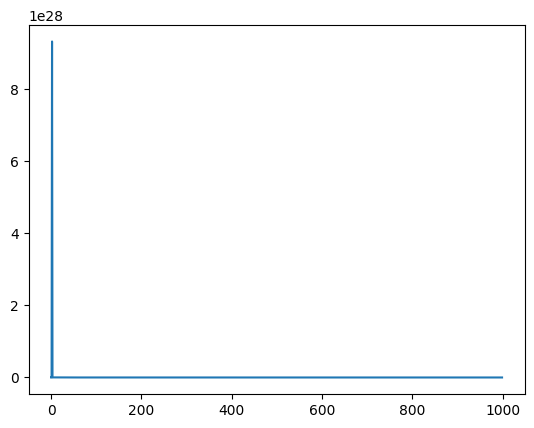

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1000),losses)
plt.show()

In [17]:
with torch.no_grad():
  y_test_pred = model(X_test)
  total_loss = criterion(y_test_pred,y_test)

  print(f'test loss: {total_loss.item()}')




test loss: 1.3321053981781006


In [28]:
def mean_absolute_precentage_error(y_true,y_pred):
  return 100*torch.mean(torch.abs((y_true-y_pred)/y_pred))

In [29]:
error = mean_absolute_precentage_error(y_test_pred,y_test)
print(error)

tensor(59.8849)
